# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\shukl\Forage_BA\data\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [14]:
df.shape

(50000, 14)

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [24]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Flight Day

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [22]:
df.flight_day.value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

Most of the customers travel on Monday and least preferred day is Saturday.

### Sales Channel

In [23]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [26]:
per_i = df.sales_channel.value_counts().values[0] / df.sales_channel.count() * 100
per_m = df.sales_channel.value_counts().values[1] / df.sales_channel.count() * 100

print(f"Number of bookings done through internet : {per_i} %")
print(f"Number of bookings done through mobile : {per_m} %")

Number of bookings done through internet : 88.764 %
Number of bookings done through mobile : 11.236 %


### Trip Type

In [28]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [29]:
per_r = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_o = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_c = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

print(f"Percentage of round trips: {per_r} %")
print(f"Percentage of One way trips: {per_o} %")
print(f"Percentage of circle trips: {per_c} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


### Purchase Lead

<AxesSubplot: xlabel='purchase_lead', ylabel='Count'>

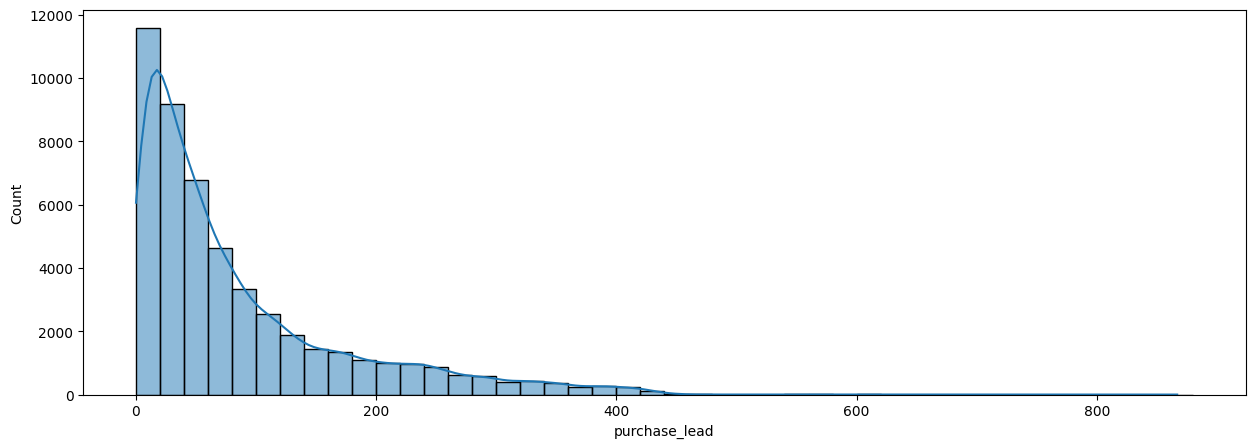

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'purchase_lead', binwidth = 20, kde = True)

It can be seen that purchase_lead with more than 600 days are outliers.

In [31]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [32]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,7,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,3,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,2,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,6,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,5,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,4,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,5,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,1,KIXMLE,Japan,0,0,1,7.00,1


In [33]:
# We filter the data with by removing purchase_lead more than 600 days

df = df[df.purchase_lead <600 ]

### Lenght of Stay

<AxesSubplot: xlabel='length_of_stay', ylabel='Count'>

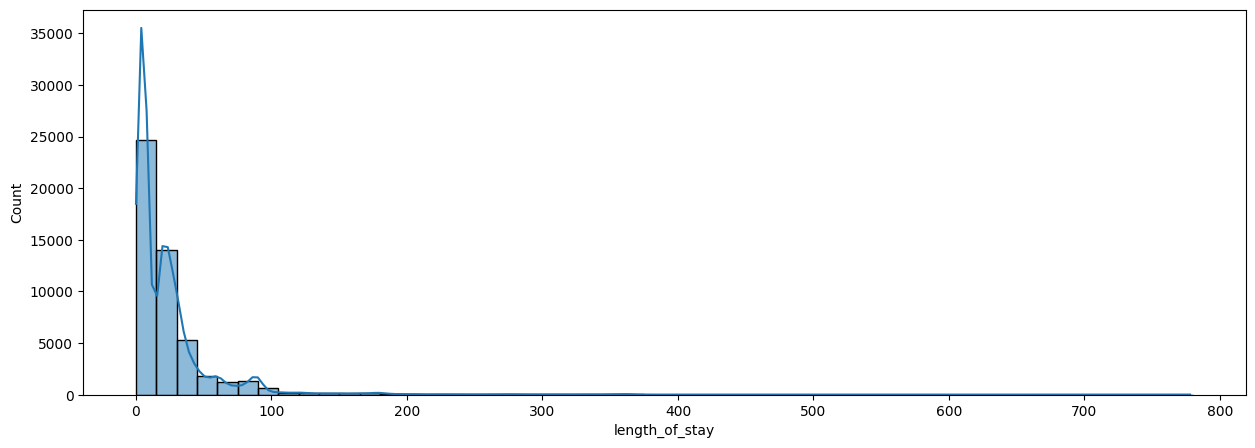

In [37]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x='length_of_stay', binwidth = 15, kde = True)

It can be seen that length of stay with more than 500 days are outliers.

In [42]:
(df.length_of_stay > 500).value_counts()

False    49982
True        10
Name: length_of_stay, dtype: int64

In [44]:
df[df.length_of_stay > 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [45]:
# We filter the data with by removing length_of_stay of more than 500 days

df = df[df.length_of_stay < 500]

### Booking Origin

Text(0, 0.5, 'Number of Bookings')

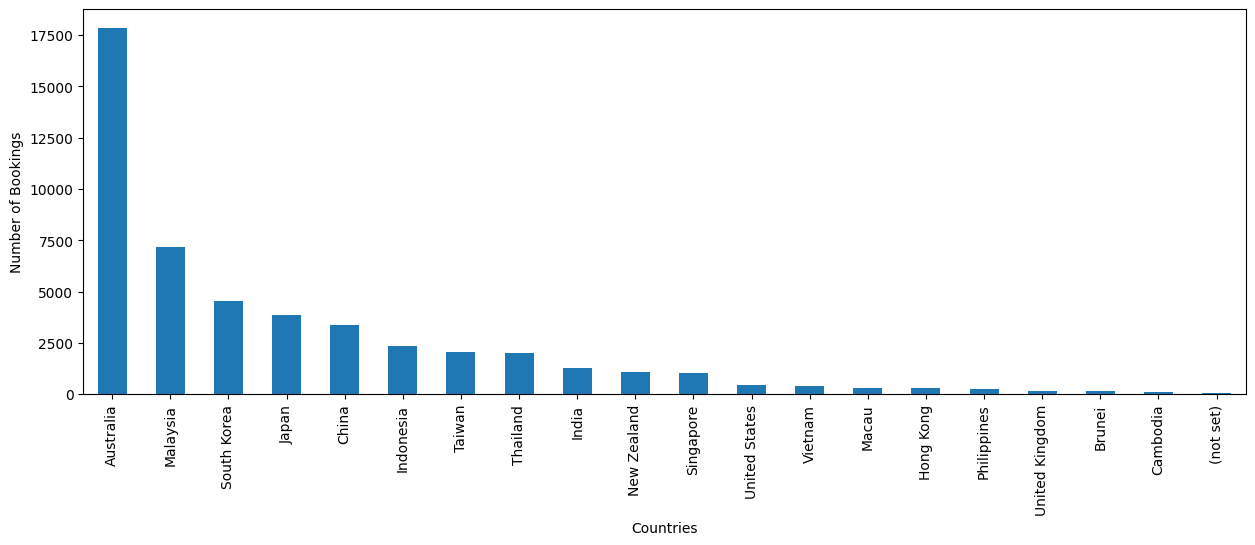

In [47]:
plt.figure(figsize = (15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind = 'bar')
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Bookings')

Most of the Booking Applications were from Australia followed by Malaysia and South Korea

Text(0, 0.5, 'Number of Complete Bookings')

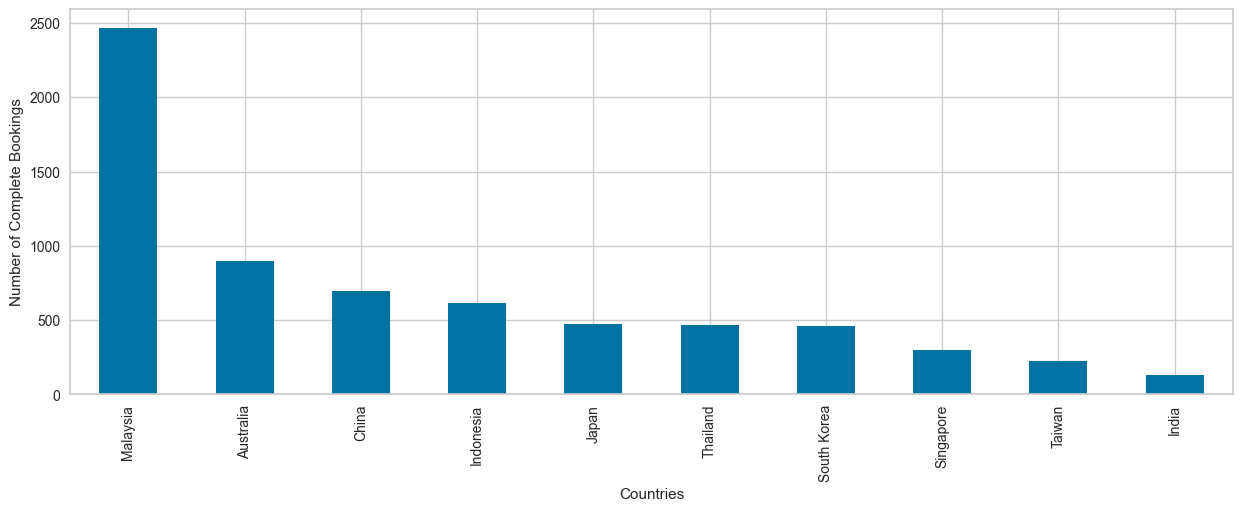

In [46]:
plt.figure(figsize = (15,5))
ax = df[df.booking_complete == 1].booking_origin.value_counts()[:10].plot(kind = 'bar')
ax.set_xlabel("Countries")
ax.set_ylabel("Number of Complete Bookings")

Maximum number of complete bookings were from Malaysia followed by Australia and China

In [58]:
success_booking = df.booking_complete.value_counts().values[1] / len(df) * 100

unsuccess_booking = 100 - success_booking

print(f"Out of 50000 booking entries only {round(success_booking,2)}% bookings were successful or complete. ")

14.955383938217759
Out of 50000 booking entries only 14.96% bookings were successful or complete. 


### Converting Filtered Dataset into csv file

In [62]:
cwd = os.getcwd()
df.to_csv(cwd+ "filtered_customer_data.csv")

## Predictive Modelling

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cwd = os.getcwd()

df = pd.read_csv(cwd+ "filtered_customer_data.csv", index_col = 0)
df = df.reset_index(drop = True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


**Now we will OneHot Encode the Categorical Values**

In [3]:
df_final = df

In [4]:
from sklearn.preprocessing import OneHotEncoder

#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [5]:
#drop categorical columns now

df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [6]:
#store the label for supervised learning

label = df['booking_complete']

In [7]:
df_final = df_final.drop('booking_complete', axis=1)
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


### Normalizing the Values

In [8]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [9]:
#create a dataframe of scled data

scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [10]:
# add the labels back to the dataframe (We don't normalize the label/target variable)

scaled_df['label']  = label
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400594,1.964979,-0.119575,-0.381719,1.096713,0.703619,-0.649929,-0.863380,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
1,-0.579556,0.301151,-0.089155,-1.120754,1.096713,-1.421224,-0.649929,-0.863380,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
2,0.400594,1.754227,-0.028314,1.465867,-0.408681,0.703619,1.538629,-0.863380,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
3,-0.579556,0.123676,0.245467,-0.935995,1.096713,-1.421224,-0.649929,1.158238,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
4,0.400594,-0.186906,-0.028314,1.096350,-0.408681,0.703619,-0.649929,1.158238,-1.174015,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400594,-0.641685,-0.515037,-0.012202,1.096713,0.703619,-0.649929,1.158238,-1.107208,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
49978,-0.579556,0.290058,-0.515037,-0.935995,1.598511,-1.421224,-0.649929,-0.863380,-1.107208,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
49979,-0.579556,-0.674962,-0.515037,2.389660,1.096713,-1.421224,-0.649929,1.158238,-1.107208,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0
49980,-0.579556,-0.774792,-0.515037,0.357315,-1.412277,0.703619,-0.649929,1.158238,-1.107208,0.35575,-0.35575,-0.048231,-0.088336,0.100826,0


### Correlation Matrix

<Axes: >

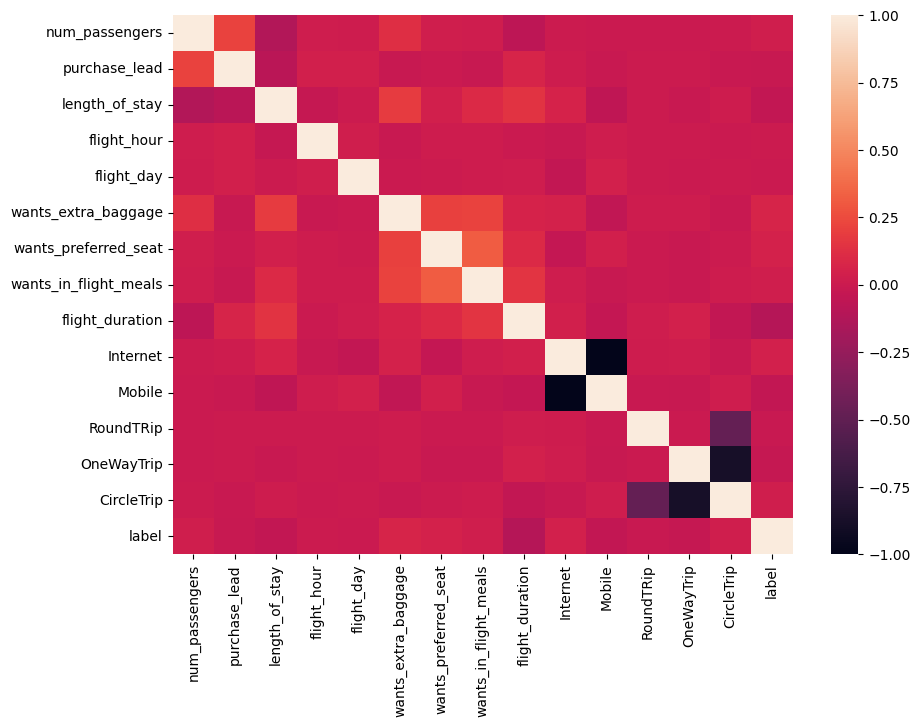

In [13]:
corr = scaled_df.corr()
plt.figure(figsize = (10,7))

# plotting the heatmap

sns.heatmap(corr)

### Splitting into training and testing datasets

In [17]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [24]:
'''
    Creating functions to fit and predict the values of whether the customer will complete the bookings or not
    and functions with metrics to evaluate the model predictions
'''
def model_fit_predict(model, X, y, X_predict):
    model.fit(X,y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

### Random Forest Classifier

In [25]:
#create an instance of the classifier and fit the training data

clf_rf = RandomForestClassifier(max_depth = 50, min_samples_split = 5, random_state = 42)

### Checking training accuracy

In [26]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


C:\Users\shukl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9341753157434037

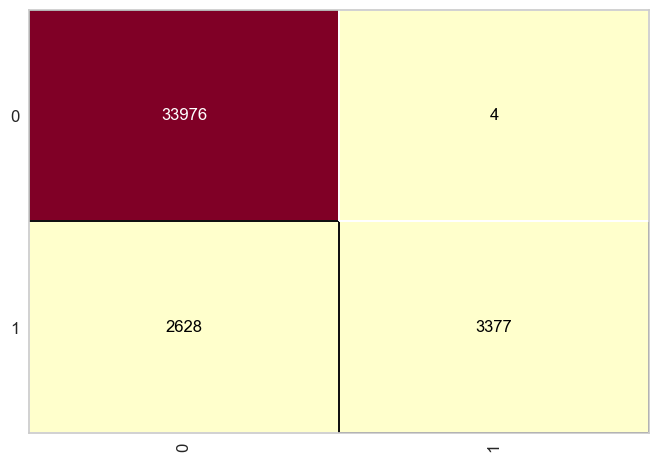

In [27]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

### Checking Testing Accuracy

In [45]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for testing data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for testing data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for testing data
pre = round(precision_score(y_test, y_pred_test),2)

#recall score for testing data
recall = recall_score(y_test, y_pred_test)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall, specificity and f1-score for testing data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively")

Accuracy, precision, recall, specificity and f1-score for testing data are 0.85, 0.52, 0.0380952380952381, 0.99 and 0.07 respectively


C:\Users\shukl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8534560368110433

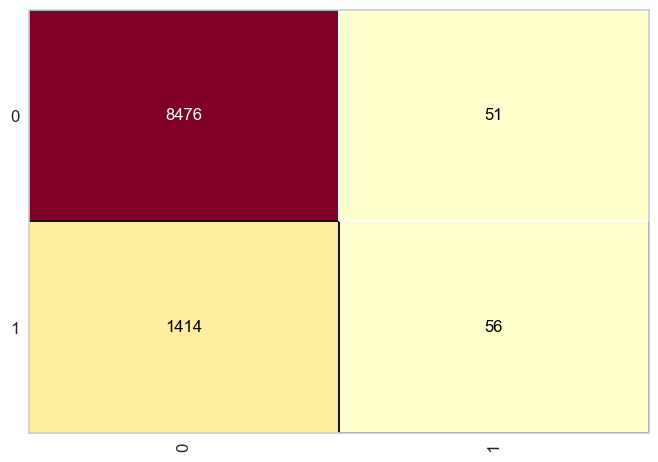

In [36]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

accuracy = cm.score(X_test, y_test)
accuracy

Text(0.5, 0, 'Random Forest Feature Importance')

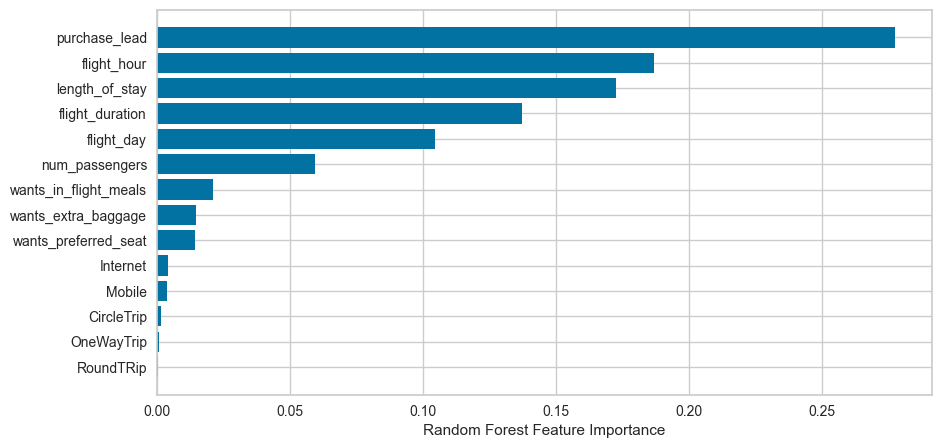

In [30]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

In [42]:
print(f"Accuracy of the Model is {round(accuracy*100,2)}%")

Accuracy of the Model is 85.35%
